In [1]:
#first import liberarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#now we load the dataset
df=pd.read_csv('Titanic-Train-Data.csv')

In [3]:
data=df.copy()

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#the shape of the dataset is
data.shape

(891, 12)

#### check the missing values of the columns 

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- In this the null values are present only at the feature of age and CABIN.
- By using feature engineering we can handle the null values.
- Here the age is a numerical variable and cabin is a categorical variable.
- by handling age we use the concepts of measue of central tendency(meadian)
- by handling cabin feature to fill the value which has highest frequency in that column.  

In [7]:
#  handling the numerical variables
#to create a function
def impute_nan(df):
    df['Age'].fillna(df['Age'].median(),inplace=True)

In [8]:
impute_nan(data)

In [9]:
#now we check the age.
data['Age'].isnull().sum() #there is no null values in the age.

0

- for cabin feature we contain blocks like A28,B34,C54,D45
- so we remove the numerical data and we keep the data only categorical features

In [10]:
data['Cabin']=data['Cabin'].str[0]

In [11]:
data['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
data['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [13]:
def impute_nan(df,variable):
    most_frequent_value=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_value,inplace=True)

In [14]:
impute_nan(data,'Cabin')

In [15]:
#now we print our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

## feature engineering

### 1. Imputation on Embarked and Age columns

In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
def impute_nan(df,variable):
    most_frequent_value=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_value,inplace=True)

In [19]:
impute_nan(data,'Embarked')

In [20]:
data.isnull().sum() #there is no null values.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

 ### 2. Ticket first letters

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


- Here we want ticket first letters reamining is not important 

In [22]:
data['ticket_first_letters']=data['Ticket'].astype(str).str[0]

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_first_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,3


### 3. cabin first letters

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_first_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,3


### 4.Encoding sex column

In [25]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

- So,here there are less no.of categorical record then we use get_dummies()

In [26]:
data1=pd.get_dummies(df['Sex'])

In [27]:
data=pd.concat([data,data1],axis=1)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_first_letters,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,A,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,P,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,3,0,1


### 4. Family size

- Here the the total family size is equal to sum of the sibsip and parch.

In [29]:
data['family_size']=data['SibSp']+data['Parch']

In [30]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_first_letters,female,male,family_size
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,C,S,3,1,0,6
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,C,S,2,0,1,1
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,C,Q,3,1,0,0
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,C,2,0,1,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B,C,P,1,0,1


### 5.One Hot Encoding for all categorical variables

- in this dataset passenger id ,name and ticket are not import we can drop it.

In [31]:
data.drop(['PassengerId','Name','Ticket','Sex'],axis=1,inplace=True)

In [32]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_first_letters,female,male,family_size
0,0,3,22.0,1,0,7.2500,C,S,A,0,1,1
1,1,1,38.0,1,0,71.2833,C,C,P,1,0,1
2,1,3,26.0,0,0,7.9250,C,S,S,1,0,0
3,1,1,35.0,1,0,53.1000,C,S,1,1,0,1
4,0,3,35.0,0,0,8.0500,C,S,3,0,1,0


In [33]:
data['female']=data['female'].astype(int)
data['male']=data['male'].astype(int)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Age                   891 non-null    float64
 3   SibSp                 891 non-null    int64  
 4   Parch                 891 non-null    int64  
 5   Fare                  891 non-null    float64
 6   Cabin                 891 non-null    object 
 7   Embarked              891 non-null    object 
 8   ticket_first_letters  891 non-null    object 
 9   female                891 non-null    int32  
 10  male                  891 non-null    int32  
 11  family_size           891 non-null    int64  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [46]:
data2=pd.get_dummies(data['Cabin'],drop_first=True)

In [47]:
data2.head()

,B,C,D,E,F,G,T
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [48]:
data3=pd.get_dummies(data['Embarked'],drop_first=True)

In [51]:
data3.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [58]:
data4=pd.get_dummies(data['ticket_first_letters'],drop_first=True)

In [59]:
#now concate the both data2 and data3
data=pd.concat([data,data2,data3,data4],axis=1)

In [60]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_first_letters,female,...,7,8,9,A,C,F,L,P,S,W
0,0,3,22.0,1,0,7.2500,C,S,A,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,C,C,P,1,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,C,S,S,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,C,S,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,C,S,3,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#the we drop the all categorical variables
data.drop(['Cabin','Embarked','ticket_first_letters'],axis=1,inplace=True)

In [62]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,family_size,B,...,7,8,9,A,C,F,L,P,S,W
0,0,3,22.0,1,0,7.2500,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### DATA VISULISATION

1. finding nan values using heat map

<AxesSubplot:>

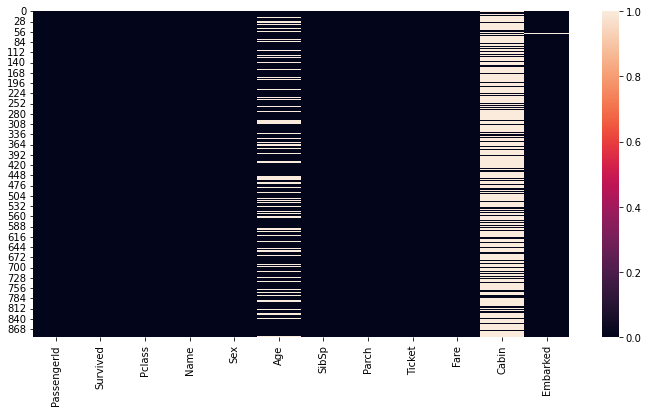

In [73]:

sns.heatmap(df.isnull()) #so here some outliers are present in it.

2. Sex Vs Age using Bar-Graph : Sex Vs Age Vs Pclass using Bar-Plot

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

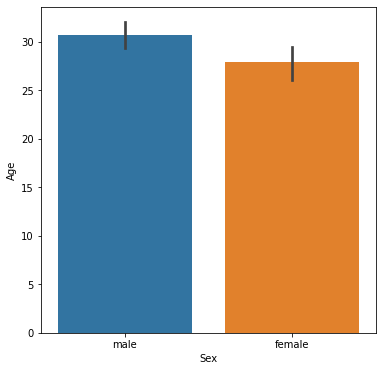

In [76]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,6)
sns.barplot(df['Sex'],df['Age'])

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

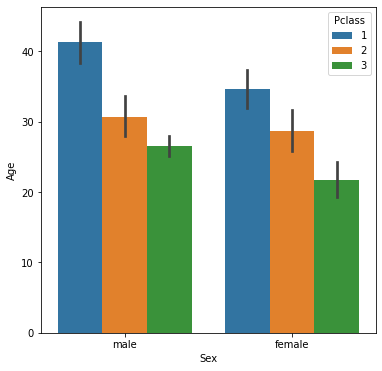

In [78]:
sns.barplot(df['Sex'],df['Age'],hue=df['Pclass'])

2. Sex Vs Age Vs Pclass using Violin-Plot 

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

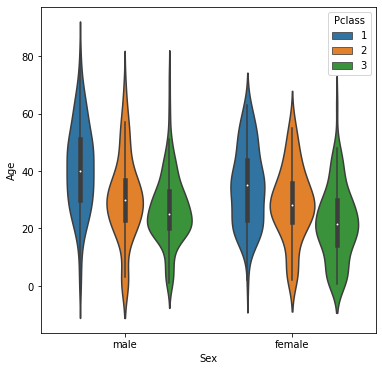

In [79]:
sns.violinplot(df['Sex'],df['Age'],hue=df['Pclass'])

3. Classifying Age using Distplot Survived Vs Age Vs Pclass using Bar-Plot 

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

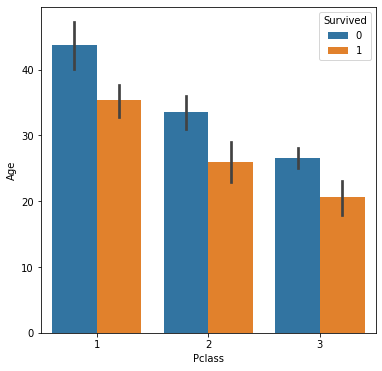

In [82]:
sns.barplot(df['Pclass'],df['Age'],hue=df['Survived'])